# PCA - Principal Components Analysis
***

## 1 Dataset: Energy efficiency


### 1.1 Description
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


### 1.2 Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 
1. X1	Relative Compactness 
2. X2	Surface Area 
3. X3	Wall Area 
4. X4	Roof Area 
5. X5	Overall Height 
6. X6	Orientation 
7. X7	Glazing Area 
8. X8	Glazing Area Distribution 
9. y1	Heating Load 
10. y2	Cooling Load

### 1.3 Link 
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

***
## 2 Load libraries and dataset

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

%matplotlib inline

### 2.2 Load .xlsx file

In [2]:
dataset = pd.read_excel('ENB2012_data.xlsx')

# Show 5 rows
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


***
## 3 Prepare data

### 3.1 Generate new class attribute

In [3]:
# Generate new class attribute. Is y1+y2 above average? 1= yes / 0 = no
dataset['aboveAVG'] = np.where((dataset['Y1'] + dataset['Y2'])>=(dataset['Y1'].mean() + dataset['Y2'].mean()), 1, 0)

### 3.2 Get X and y values

In [4]:
# Values of target
y = dataset['aboveAVG'].values

# Values of attributes
dataset = dataset.drop(['Y1', 'Y2', 'aboveAVG'], axis=1)
X = dataset.values

### Get number of features

In [5]:
number_features = len(dataset.columns)

***
## 4 PCA

### 4.1 Initialize and fit

In [6]:
pca=PCA(n_components=number_features)                                    
pca.fit(X)                                

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 4.2 Evalute Components

In [7]:
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[  1.07608955e-03,  -9.04057918e-01,  -5.76579398e-02,
         -4.23199989e-01,   1.59829563e-02,  -2.83195884e-19,
         -4.06786406e-21,  -5.92520321e-19],
       [ -1.72341722e-04,   1.25907815e-01,   9.10963014e-01,
         -3.92527600e-01,   1.46854541e-02,   2.75040784e-19,
         -5.09158294e-20,  -2.98077268e-19],
       [ -4.43147322e-17,  -9.99704009e-17,   1.00227184e-16,
          1.99887886e-16,  -3.72907876e-17,   8.32667268e-17,
         -1.84192707e-02,  -9.99830351e-01],
       [  6.06494992e-18,  -1.03365895e-16,   1.03861458e-16,
          2.05822846e-16,  -3.68248251e-17,  -1.00000000e+00,
          1.70848578e-15,  -1.11022302e-16],
       [  2.10316845e-02,  -1.25797838e-02,   1.24611442e-02,
         -1.25204640e-02,  -9.99543583e-01,   3.67624737e-17,
         -3.92172825e-17,   3.78782746e-17],
       [  2.38850638e-17,   1.49387441e-15,  -1.49379744e-15,
         -2.98917065e-15,  -3.94059121e-17,   1.54932490e-15,
          9.99830351e-01,  -1.8

### 4.3 Explained Variance Ratio

In [8]:
pca.explained_variance_ratio_

array([  8.07032434e-01,   1.92639516e-01,   2.05504811e-04,
         1.06893310e-04,   1.41960454e-05,   1.44648296e-06,
         9.05142690e-09,   6.33435391e-32])

### 4.3 Explained Variance

In [9]:
pca.explained_variance_

array([  9.44966328e+03,   2.25564486e+03,   2.40628651e+00,
         1.25162973e+00,   1.66223616e-01,   1.69370849e-02,
         1.05984509e-04,   7.41698958e-28])

### 4.4 Cumulative sum of variance explained with [n] features

In [10]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance

array([  80.7,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ])

### 4.5 Plot in graph

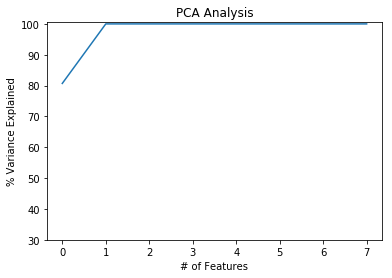

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

### 4.6 New PCA with the best number of components (2)

In [12]:
# "rule of thumb"
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

logistic = linear_model.LogisticRegression()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

### 4.7 Plot projection of PCA with best number of components

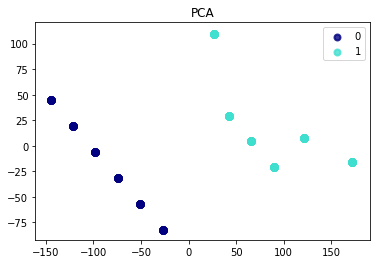

In [13]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.show()

***
## 5 Machine Learning

### 5.1 Split dataset in train and test subsets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5.2 Fit model

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

### 5.3 Predict

In [16]:
y_pred = pipeline.predict(X_test)

### 5.4 Evaluate results

In [17]:
# Score
pipeline.score(X_test, y_test)

0.97835497835497831

In [18]:
# F-measure
f1_score(y_test, y_pred, average='micro')

0.97835497835497831

### 5.5 Confusion Matrix

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[114,   5],
       [  0, 112]], dtype=int64)

In [20]:
# Normalized (%)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[ 0.95798319  0.04201681]
 [ 0.          1.        ]]


Text(0.5,15,'Predicted label')

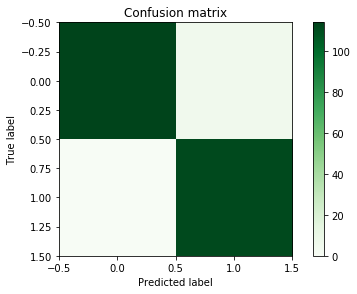

In [21]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')